In [157]:
import pandas as pd
import matplotlib.pyplot as plt
import importlib
import seaborn as sns
import scipy.stats
import sklearn
import dtsc.process as prep
import dtsc.visualizer as vue
import dtsc.analyzer as analys

#For avoiding to restart kernel each time I modify the "dtsc" module
importlib.reload(prep)
importlib.reload(vue)
importlib.reload(analys)

_dict = {
    "TrackCat":{
        0:"Main tracks",
        1:"Secondary tracks"
    },
    "Region":{
        0:"Wallonia",
        1:"Flanders",
        2:"Brussels"
    }
}

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Data Collection and Preprocessing 
(No need to run this !! Preprocessed data are saved in /data)

The dataset essentially tracks the temporal evolution of the number of rail kilometers and devices installed on these tracks, depending on the region and the type of track. It spans the period from 2006 to 2023, allowing me to observe how these variables change over time.

I started by extracting data from a CSV file, which I directly downloaded from the Open Data platform of Infrabel. This raw data required some preprocessing steps. First, I reduced unnecessary or redundant dimensions, such as removing duplicate regional translations and keeping only the English version. I also renamed the columns to be clearer and more consistent. Then, I ensured that the data types for each column were correctly applied, whether numerical or textual. Lastly, I verified the integrity of the dataset to check for duplicates or missing rows.

In [158]:
#data extraction
df = pd.read_csv('./data/raw_data_fr.csv', delimiter=';')
df.head()

# data pre processing
data = prep.reduce_dimensions(df)
data = prep.rename_columns(data)
data = prep.apply_data_type(data)

prep.check_data_integrity(data)

#sort by date
data = data.sort_values(by=['Year'],ascending=True)

data.to_csv('./data/prep_data.csv',index_label="id")
data.tail()

###  Dimension reduce process ###
Trying to remove redundant information like translation after verification
Differents regions :
['Bruxelles-Capitale' 'Flandre' 'Wallonie']
['Brussel-Hoofdstad' 'Vlaanderen' 'Wallonië']
['Brussels' 'Flanders' 'Wallonia']

Differents types :
['Voie principale' 'Voie secondaire']
['Hoofdspoor' 'Bijspoor']
['Main tracks' 'Secondary tracks']

Duplicated rows :  0
Missing values :  0


,Year,Region,TrackCat,Kilometer,Devices
36,2023,Brussels,Secondary tracks,115,414
37,2023,Flanders,Main tracks,3294,2012
38,2023,Flanders,Secondary tracks,1048,2599
39,2023,Wallonia,Main tracks,2954,1516
0,2023,Brussels,Main tracks,317,473


Run this cell in order to load variables data !!

In [159]:
data = pd.read_csv('./data/prep_data.csv',index_col="id")
norm_data = prep.normalize_distinctly(data)

corr_data_all = pd.DataFrame()

for region in data["Region"].unique():
    for trackcat in data["TrackCat"].unique():
        km = list(data[(data["Region"]==region) & (data["TrackCat"]==trackcat)]["Kilometer"])
        d =  list(data[(data["Region"]==region) & (data["TrackCat"]==trackcat)]["Devices"])
        corr_data_all.insert(0, f'Kilometer {region} {trackcat}', km)
        corr_data_all.insert(0, f'Devices {region} {trackcat}', d)



# Data Visualization

Given that we have a limited dataset with only 108 rows spanning 18 years and considering there are just a few categories—specifically 2 track types across 3 regions—it's important to acknowledge that we don't have a vast amount of data to work with. This means we have limited variables, focusing primarily on kilometers and devices.

Therefore, it will be more beneficial to leverage various visualization techniques to explore the data comprehensively. By employing multiple perspectives and paradigms, we can better understand the trends and patterns within the dataset, allowing us to draw more meaningful insights and interpretations from the available information.

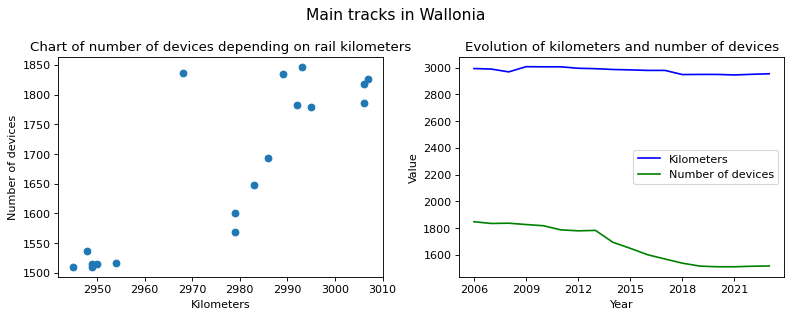

In [160]:
#visualization
region_id = 0
trackcat_id = 0

region = _dict["Region"][region_id]
trackcat = _dict["TrackCat"][trackcat_id]

vue.plot_numericals(region,trackcat,data)

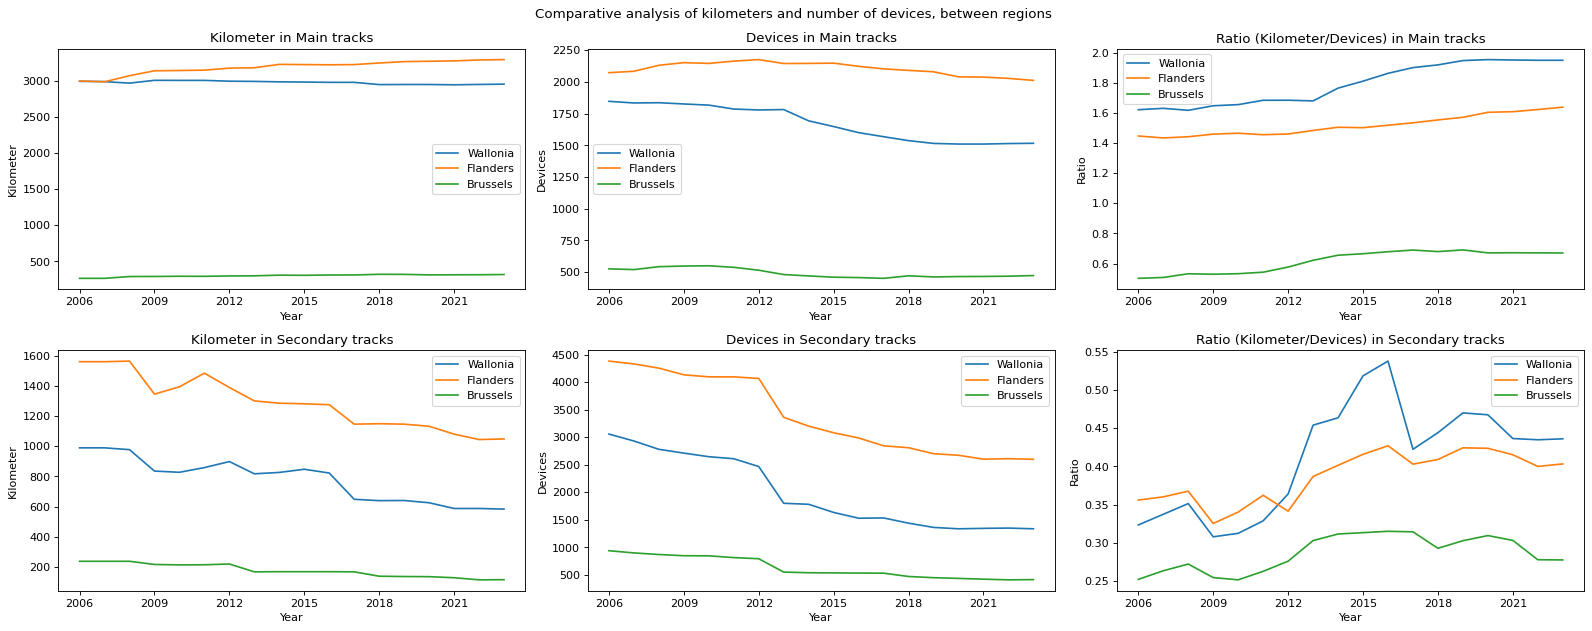

,Devices Brussels Secondary tracks,Kilometer Brussels Secondary tracks,Devices Brussels Main tracks,Kilometer Brussels Main tracks,Devices Flanders Secondary tracks,Kilometer Flanders Secondary tracks,Devices Flanders Main tracks,Kilometer Flanders Main tracks,Devices Wallonia Secondary tracks,Kilometer Wallonia Secondary tracks,Devices Wallonia Main tracks,Kilometer Wallonia Main tracks
count,18.000000,18.000000,18.000000,18.00000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,627.833333,176.500000,492.444444,301.00000,3379.111111,1287.888889,2104.444444,3188.111111,1980.555556,777.444444,1673.222222,2976.555556
std,196.517998,43.635185,35.892359,16.79986,702.890661,176.901730,50.943131,93.159502,651.257446,144.562310,138.628388,22.261077
min,410.000000,114.000000,451.000000,264.00000,2599.000000,1044.000000,2012.000000,2987.000000,1337.000000,583.000000,1510.000000,2945.000000
25%,454.500000,136.500000,465.250000,292.25000,2728.000000,1146.000000,2074.750000,3144.250000,1381.250000,639.250000,1521.250000,2951.000000
50%,537.500000,168.000000,472.000000,307.00000,3141.000000,1283.000000,2113.000000,3223.500000,1708.000000,824.000000,1670.500000,2981.000000
75%,838.000000,215.500000,524.500000,312.75000,4096.000000,1392.750000,2146.000000,3261.250000,2636.750000,855.250000,1809.250000,2992.750000
max,939.000000,237.000000,550.000000,320.00000,4382.000000,1564.000000,2176.000000,3294.000000,3057.000000,989.000000,1847.000000,3007.000000


In [161]:
vue.compareRegions(data,data)
corr_data_all.describe()

Analysis of Variations in Devices and Kilometers

Variations in the Number of Devices
- The variations seems almost identical between different regions for secondary tracks.
- Still for secondary tracks, there is a big downgrade in 2012.

Ratio of Kilometers to Number of Devices for Main Tracks
- Until 2013, there is a strong resemblance, almost stagnation, indicating proportionality.
- After 2013, an increase is observed, due to multiple potential causes (investments in new devices, Decrease in kilometers )

Comparison of Kilometers on Main Tracks
- Brussels and Flanders show similar trends.
- In Wallonia, the trend is very different.

Variations in Kilometers for Secondary Tracks
- The variations are not very similar, showing diversity among regions.
- Despite this, a certain similarity persists.

Ratio of Kilometers to Number of Devices for Secondary Tracks
- The variations aren't pronounced.
- The fluctuations in kilometers and devices contribute to significant variability.

Devices on Main Tracks
- Although there is some resemblance, it is relatively weak.

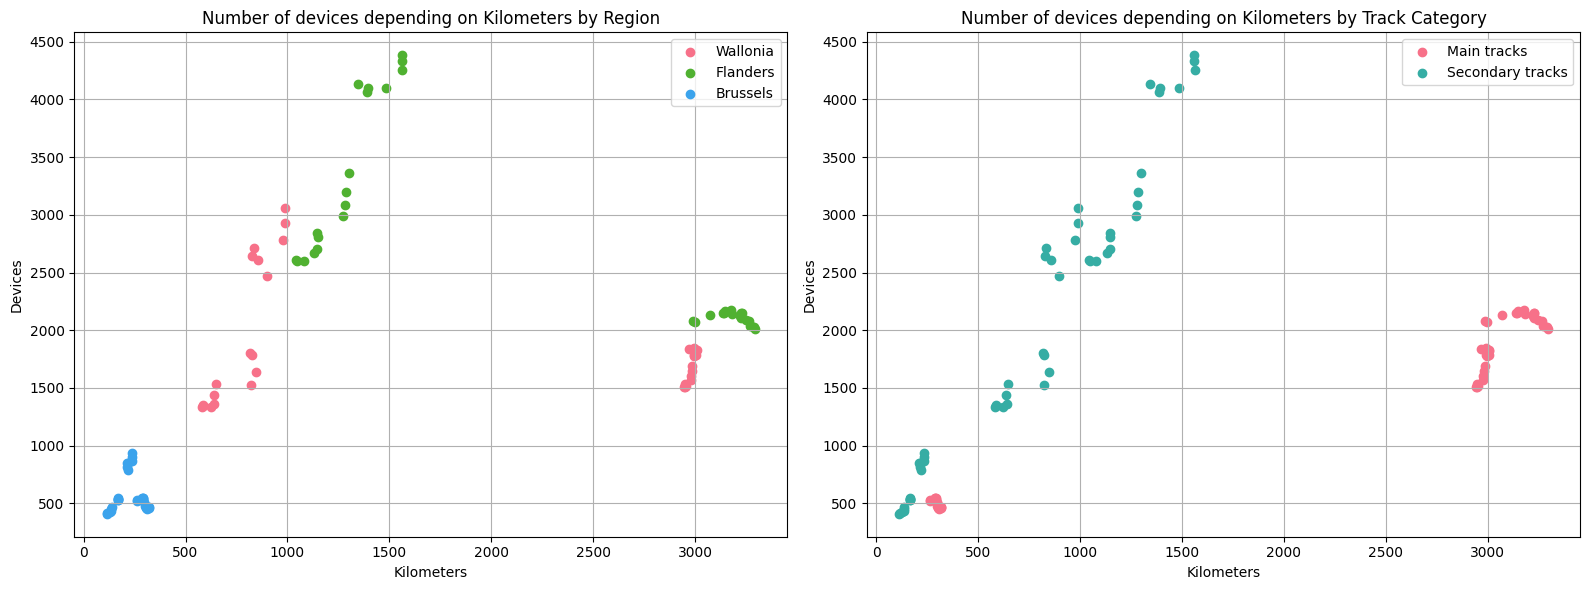

In [162]:
vue.plot_numericals_colored(data)

**Distinction of Brussels** :The data points for Brussels are well-separated, likely due to its smaller geographical area, resulting in fewer kilometers and devices.

**Overlap in Flanders and Wallonia** : Notable overlap exists in the Flanders and Wallonia regions, especially for secondary tracks, around 2500-3000 devices and 750-1250 kilometers, indicating a mix that may require further investigation.

**Separation in Secondary Tracks** : For main tracks, the data points for Flanders and Wallonia are distinct, allowing for easier differentiation between the two regions.

**Global vs. Local Visualization** : The overall scatter plot may not clearly distinguish the regions at a global level; however, focusing solely on Brussels will likely reveal a more distinct separation of data points, suggesting that local analyses may provide clearer insights into regional variations.

**Further Investigation Suggested** : The observed overlap and distinctions, particularly in the range of 2500-3000 devices and 750-1250 kilometers, warrant deeper exploration to identify any patterns or anomalies that could inform further analysis or operational decisions.


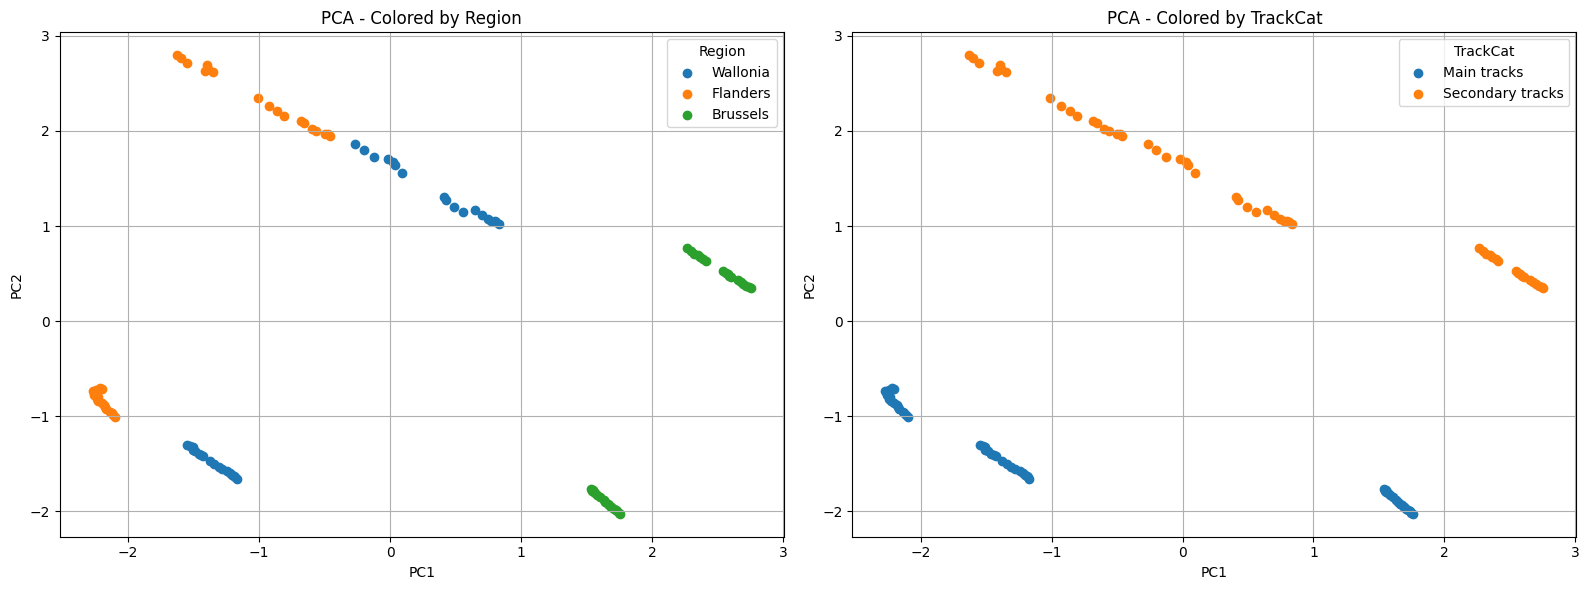

In [163]:
pca = analys.perform_pca(data)
vue.plot_pca(pca)

After performing a Principal Component Analysis (PCA), we observe a distinct separation between the different regions and track types. However, there are also separations for each of them for Main Tracks. 

- **Brussels**: There is a slight separation among the values for the main track. The points tend to cluster but do not create a strong distinction.
  
- **Wallonia**: A clearer separation emerges here, with two distinct groups forming, indicating a stronger clustering among the values.
  
- **Flanders**: The separation is different from that observed in Brussels and Wallonia, suggesting unique characteristics or behaviors in this region.

Overall, the PCA results indicate that while some regions exhibit clear clustering, others, like Brussels, have more overlap, which could warrant further investigation.

# Correlation Analysis

This section focuses on analyzing correlations to determine if there are relationships between the different groups within the data. I will use Spearman's correlation coefficient. The reason for choosing Spearman's correlation is that it does not assume a linear relationship between the variables, but rather assesses whether there is a monotonic relationship. This makes it more robust when dealing with non-linear data, such as we have here, where the data may not follow a perfect linear trend but may still show some form of ordered relationship. Additionally, Spearman’s correlation is less sensitive to outliers, which can be beneficial when analyzing real-world datasets like this one.

 Correlation between Kilometer and Devices : 0.67


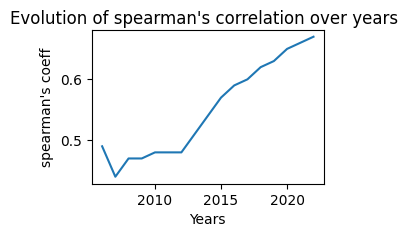

In [164]:
method = 'spearman'
#corr_data = data[(data["Year"] <= 2023) & (data["TrackCat"]=="Main tracks")]
correlation = data['Kilometer'].corr(data['Devices'], method=method)
print(f" Correlation between Kilometer and Devices : {round(correlation,2)}")

evolution_corr = []
for i in range(2006,2023,1):
    subset = data[(data["Year"] <= i)]#& (data["TrackCat"]=="Main tracks")]
    subset_corr = subset['Kilometer'].corr(subset['Devices'], method=method)
    evolution_corr.append(round(subset_corr,2))

plt.figure(figsize=(3,2))
plt.plot(range(2006,2023,1),evolution_corr)
plt.suptitle(f"Evolution of {method}'s correlation over years")
plt.ylabel(f"{method}'s coeff")
plt.xlabel("Years")
plt.show()

The primary goal of this graphical analysis was to determine whether the correlation between the number of kilometers and the number of devices was consistent over the years. Specifically, I aimed to explore if there was a strong correlation during the earlier years, and how this relationship evolved over time. As we can see, there isn't.

The Spearman coefficient is 0.67, which is fairly strong, indicating a moderate positive correlation between kilometers and the number of devices. This suggests that as kilometers increase, the number of devices also tends to increase, although the relationship is not perfectly linear.

To dive deeper into the analysis, it is useful to separate the categories and examine the correlation matrices by region or track category (main tracks, secondary tracks). This will allow for a more detailed study of how these relationships differ across regions (Brussels, Flanders, Wallonia) or track types and help identify specific patterns.

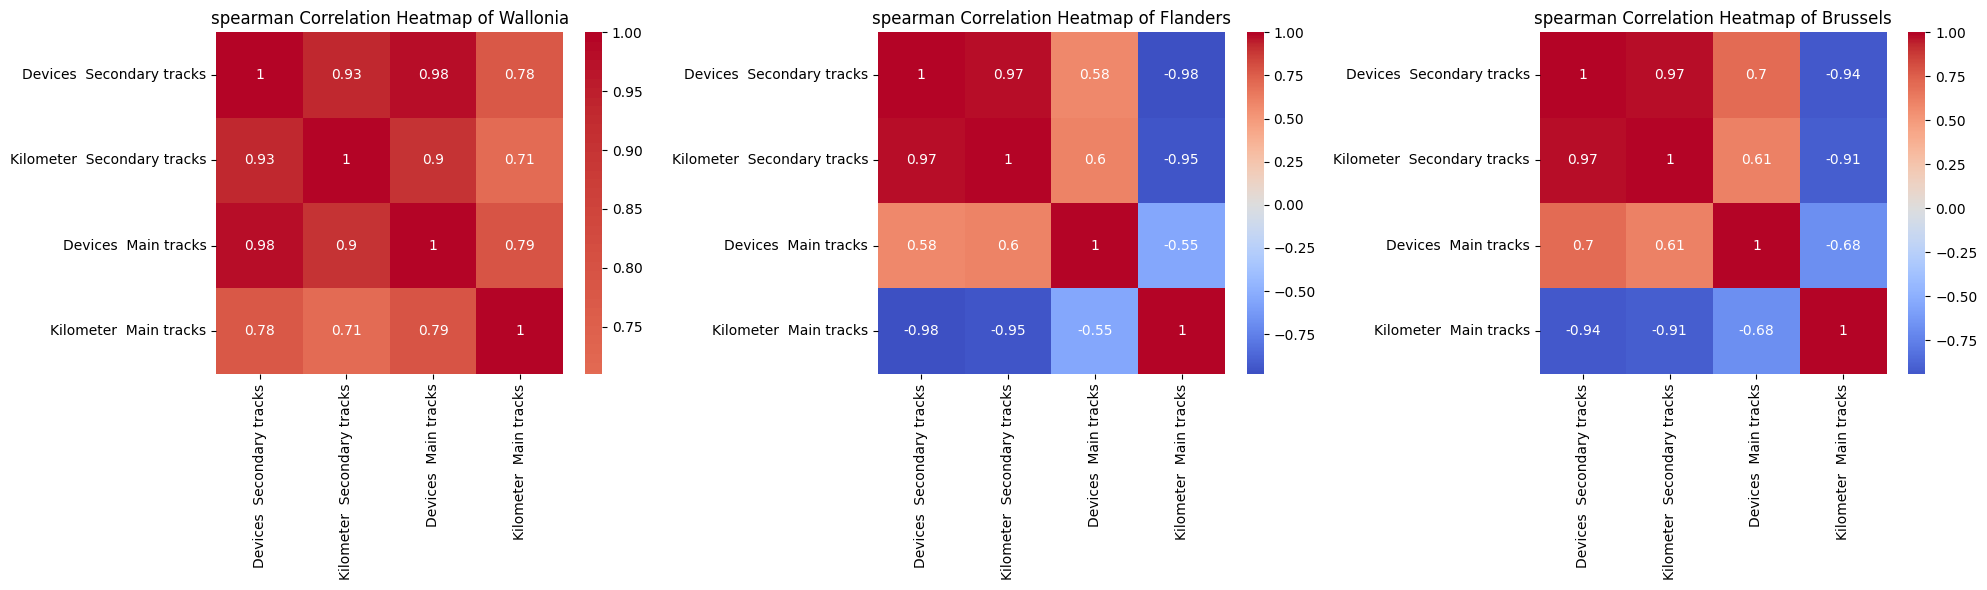

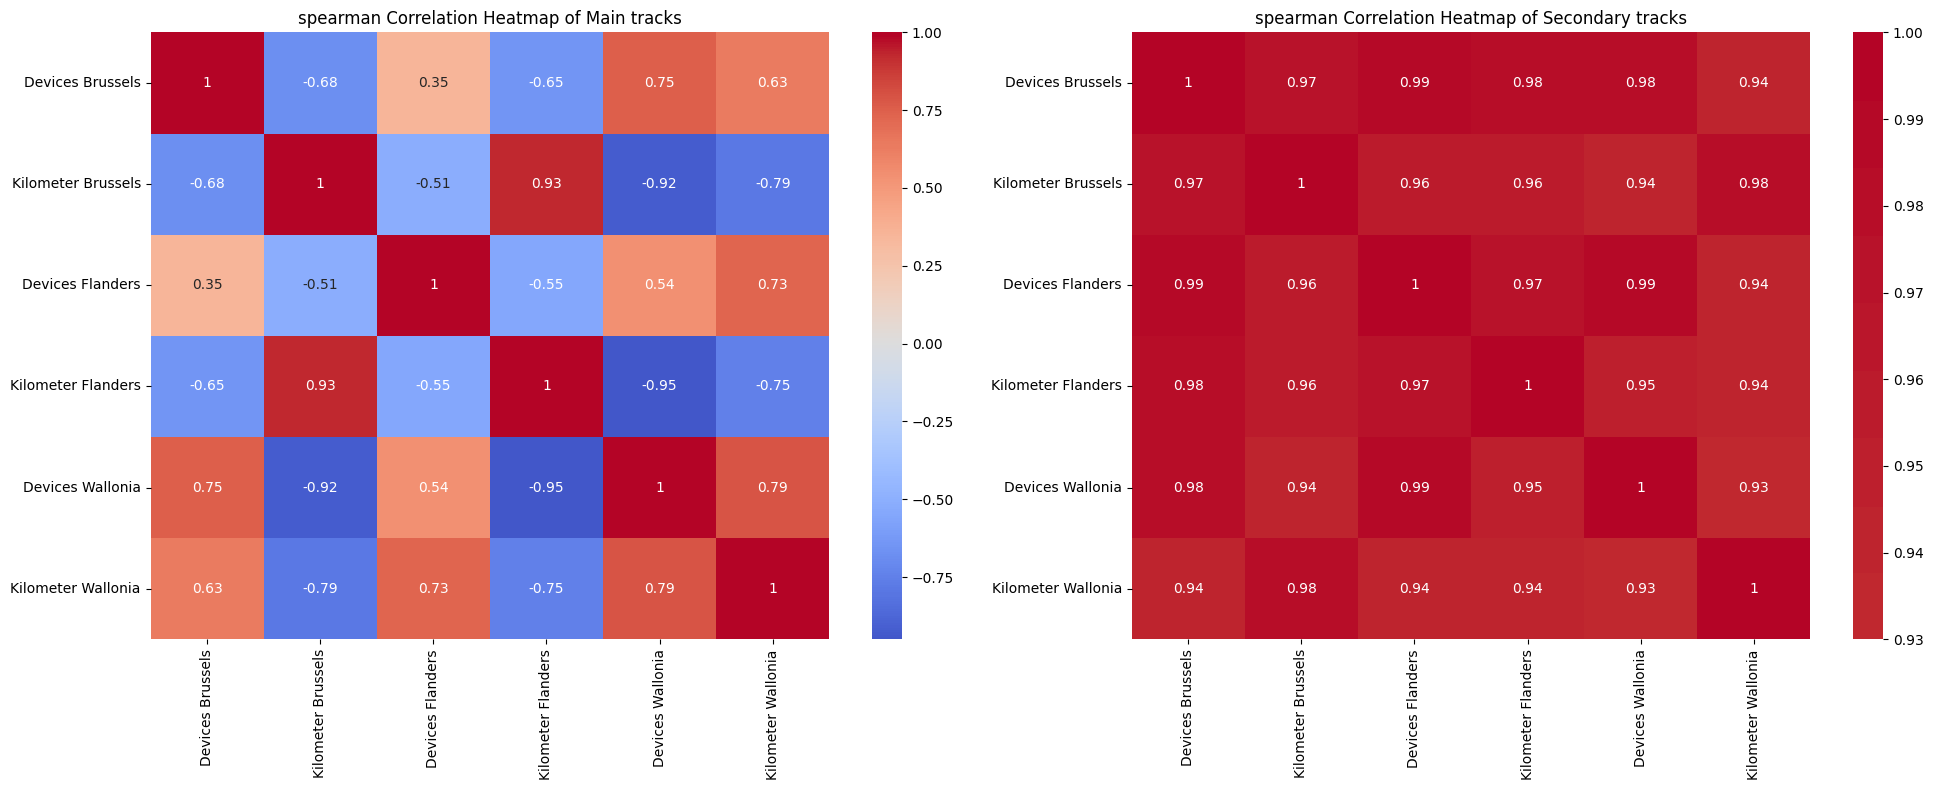

In [165]:
fig, axs = plt.subplots(1, len(data["Region"].unique()), figsize=(20, 6))

for i, region in enumerate(data["Region"].unique()):
    corr_data = corr_data_all[[c for c in corr_data_all.columns if region in c]]
    corr_data.columns = corr_data.columns.str.replace(region, '', regex=False).str.strip()
    
    matrix_corr = corr_data.corr(method=method).round(2)
    sns.heatmap(matrix_corr, annot=True, cmap='coolwarm', center=0, ax=axs[i])
    axs[i].set_title(f'{method} Correlation Heatmap of {region}')

plt.tight_layout()
plt.show()

fig, axs = plt.subplots(1, len(data["TrackCat"].unique()), figsize=(20, 8))

for i, region in enumerate(data["TrackCat"].unique()):
    corr_data = corr_data_all[[c for c in corr_data_all.columns if region in c]]
    corr_data.columns = corr_data.columns.str.replace(region, '', regex=False).str.strip()
    
    matrix_corr = corr_data.corr(method=method).round(2)
    sns.heatmap(matrix_corr, annot=True, cmap='coolwarm', center=0, ax=axs[i])
    axs[i].set_title(f'{method} Correlation Heatmap of {region}')

plt.tight_layout()
plt.show()

There are many relevant informations that can be leveraged. For this technical test, let's dive into one :
In the correlation analysis, I found strong correlations on the secondary tracks. The devices evolve in a highly consistent manner, with a correlation score of  0.99. This indicates a very high level of similarity in the variation of device numbers across regions on secondary tracks, confirming earlier observations. This level of correlation highlights that changes in devices are closely aligned, suggesting a common underlying factor driving these variations. 

# Hypothesis Testing for Statistical Significance

### Test 1 : Correlation Significance of number of devices of secondary tracks between regions. 
In this hypothesis test, I examined the correlation between the number of devices on secondary tracks across three distinct regions: Brussels, Flanders, and Wallonia.

In [167]:
secondary_tracks_data = data[(data["TrackCat"] == "Secondary tracks")]

brussels_data = secondary_tracks_data[secondary_tracks_data["Region"] == "Brussels"]["Devices"]
flanders_data = secondary_tracks_data[secondary_tracks_data["Region"] == "Flanders"]["Devices"]
wallonia_data = secondary_tracks_data[secondary_tracks_data["Region"] == "Wallonia"]["Devices"]

pearson_corr_fl_brussels, pearson_p_fl_brussels = stats.pearsonr(brussels_data, flanders_data)
pearson_corr_wallonia_brussels, pearson_p_wallonia_brussels = stats.pearsonr(brussels_data, wallonia_data)
pearson_corr_wallonia_flanders, pearson_p_wallonia_flanders = stats.pearsonr(flanders_data, wallonia_data)

print("Pearson Correlation Results:")
print(f"Brussels and Flanders: Correlation={pearson_corr_fl_brussels}, p-value={pearson_p_fl_brussels}")
print(f"Brussels and Wallonia: Correlation={pearson_corr_wallonia_brussels}, p-value={pearson_p_wallonia_brussels}")
print(f"Flanders and Wallonia: Correlation={pearson_corr_wallonia_flanders}, p-value={pearson_p_wallonia_flanders}")

spearman_corr_fl_brussels, spearman_p_fl_brussels = stats.spearmanr(brussels_data, flanders_data)
spearman_corr_wallonia_brussels, spearman_p_wallonia_brussels = stats.spearmanr(brussels_data, wallonia_data)
spearman_corr_wallonia_flanders, spearman_p_wallonia_flanders = stats.spearmanr(flanders_data, wallonia_data)

print("\nSpearman Correlation Results:")
print(f"Brussels and Flanders: Correlation={spearman_corr_fl_brussels}, p-value={spearman_p_fl_brussels}")
print(f"Brussels and Wallonia: Correlation={spearman_corr_wallonia_brussels}, p-value={spearman_p_wallonia_brussels}")
print(f"Flanders and Wallonia: Correlation={spearman_corr_wallonia_flanders}, p-value={spearman_p_wallonia_flanders}")


Pearson Correlation Results:
Brussels and Flanders: Correlation=0.9905554134326383, p-value=3.0904122826979252e-15
Brussels and Wallonia: Correlation=0.9945259182138262, p-value=3.9849626958177145e-17
Flanders and Wallonia: Correlation=0.992009691702955, p-value=8.147663696269229e-16

Spearman Correlation Results:
Brussels and Flanders: Correlation=0.9932887229730295, p-value=2.0262802685416723e-16
Brussels and Wallonia: Correlation=0.9819309517124232, p-value=5.399032662326211e-13
Flanders and Wallonia: Correlation=0.9886363636363639, p-value=1.3492343744047491e-14


According to the p-values, It indicates that I have sufficient evidence to reject the null hypothesis, which states that there is no correlation between the two regions.

### Test 2 : Normality Assessment Test for number of devices of secondary tracks between regions. 
The three groups (Brussels, Flanders, and Wallonia) are considered independent. In this study, I aimed to assess the normality of the distribution of the number of devices on secondary tracks across these regions.

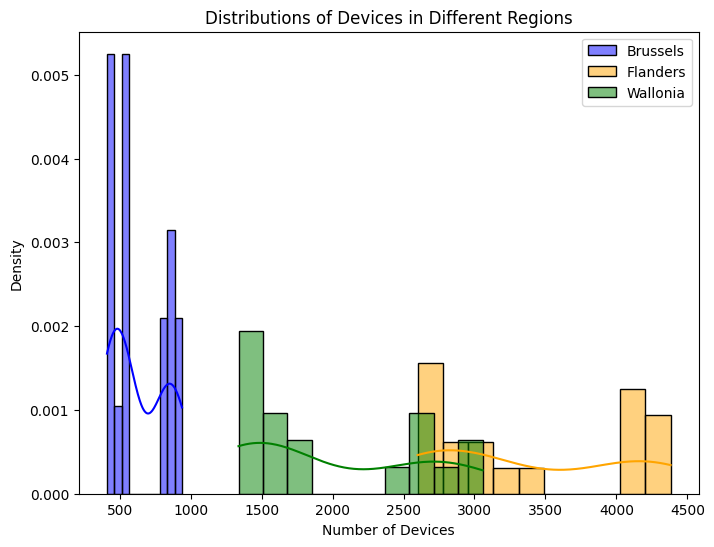

Shapiro-Wilk Test:
Brussels: W=0.8364052772521973, p-value=0.005207803566008806
Flanders: W=0.8349291086196899, p-value=0.004944356624037027
Wallonia: W=0.8250771760940552, p-value=0.0035117289517074823


In [169]:

secondary_tracks_data = data[(data["TrackCat"] == "Secondary tracks")]

brussels_data = secondary_tracks_data[secondary_tracks_data["Region"] == "Brussels"]["Devices"]
flanders_data = secondary_tracks_data[secondary_tracks_data["Region"] == "Flanders"]["Devices"]
wallonia_data = secondary_tracks_data[secondary_tracks_data["Region"] == "Wallonia"]["Devices"]

plt.figure(figsize=(8, 6))
sns.histplot(brussels_data, kde=True, label='Brussels', color='blue', bins=10, stat="density", alpha=0.5)
sns.histplot(flanders_data, kde=True, label='Flanders', color='orange', bins=10, stat="density", alpha=0.5)
sns.histplot(wallonia_data, kde=True, label='Wallonia', color='green', bins=10, stat="density", alpha=0.5)
plt.legend()
plt.title('Distributions of Devices in Different Regions')
plt.xlabel('Number of Devices')
plt.ylabel('Density')
plt.show()

#Test de normalité (Shapiro-Wilk)
print("Shapiro-Wilk Test:")
shapiro_brussels = stats.shapiro(brussels_data)
shapiro_flanders = stats.shapiro(flanders_data)
shapiro_wallonia = stats.shapiro(wallonia_data)

print(f"Brussels: W={shapiro_brussels.statistic}, p-value={shapiro_brussels.pvalue}")
print(f"Flanders: W={shapiro_flanders.statistic}, p-value={shapiro_flanders.pvalue}")
print(f"Wallonia: W={shapiro_wallonia.statistic}, p-value={shapiro_wallonia.pvalue}")




Since all p-values are less than the significance level of 0.05, we reject the null hypothesis of normality for each region's distribution. This confirms that the data is not normally distributed.

# Exploratory Data Analysis

### Anomaly Detection

I was tasked with performing anomaly detection on the dataset. As the algorithm, I chose Isolation Forest because it is one of the most well-known and intuitive algorithms. For my initial approach, I decided to use the numerical values for kilometers, devices, and year, allowing the Isolation Forest algorithm to handle the detection process. When I displayed the scatter plot of the number of devices against kilometers, it became evident that the anomalies were generally the points furthest away from the main cluster, indicating their outlier nature.

     Year    Region          TrackCat  Kilometer  Devices  Anomaly
id                                                                
35   2006  Flanders  Secondary tracks       1560     4382       -1
69   2006  Wallonia  Secondary tracks        989     3057       -1
68   2007  Flanders  Secondary tracks       1560     4331       -1
101  2008  Flanders  Secondary tracks       1564     4254       -1
22   2012  Flanders  Secondary tracks       1389     4067       -1
37   2023  Flanders       Main tracks       3294     2012       -1


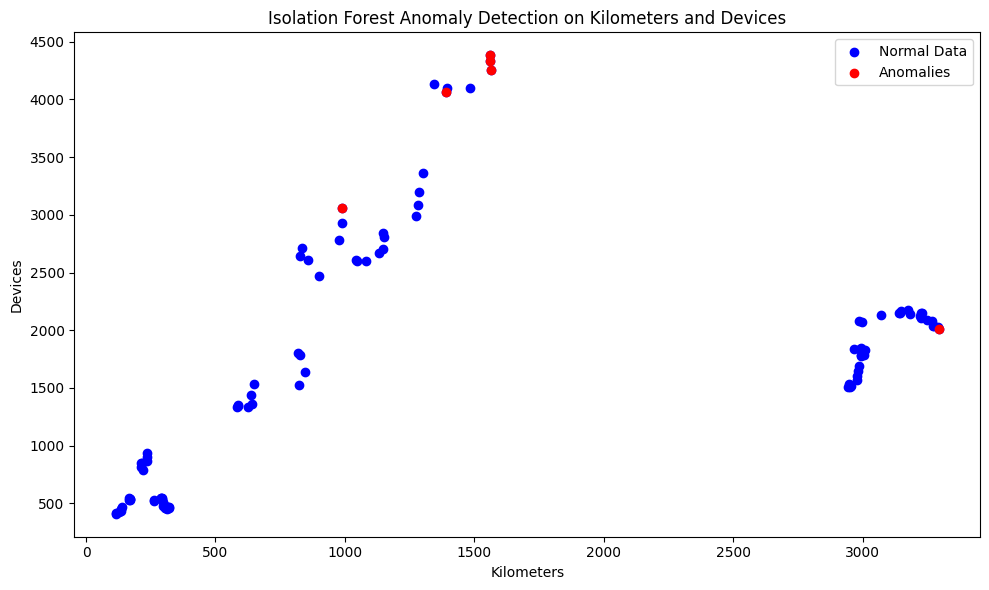

In [170]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

features = data[["Year","Kilometer", "Devices"]]


scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


model = IsolationForest(random_state=42, contamination=0.05)
data['Anomaly'] = model.fit_predict(scaled_features)

anomalies = data[data['Anomaly'] == -1]

print(anomalies)

plt.figure(figsize=(10, 6))
plt.scatter(data['Kilometer'], data['Devices'], c='blue', label='Normal Data')
plt.scatter(anomalies['Kilometer'], anomalies['Devices'], c='red', label='Anomalies')
plt.title('Isolation Forest Anomaly Detection on Kilometers and Devices')
plt.xlabel('Kilometers')
plt.ylabel('Devices')
plt.legend()
plt.tight_layout()
plt.show()


As we can see in Data visualization section, the data varies significantly across regions and track types, leading to differing trends in their evolution due to external causes(for example irregular investments for infrastructures of regions/tracks). For instance, investment might first focus on Flanders before addressing other areas, or there may be a prioritization of upgrading secondary tracks that are considered more important. These external factors could help explain the differences in evolution patterns.

Another approach would be to analyze the temporal evolution of kilometers and devices separatly from regions and track categories over time, to enable a more accurate comparison of comparable data points, to determine if the values are plausible when comparing one year before and one year after. This comparison would allow us to assess the impact of those changes more accurately.

Note: Isolation Forest often detects anomalies in the first and last values. This may be due to the fact that these points are isolated, especially in time series data. To address this issue, I temporarily duplicated these points to represent 2005 and 2024, allowing the model to focus on the other points.

C:\Users\melih\AppData\Local\Temp\ipykernel_18728\594877434.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_row["Year"] = 2005
C:\Users\melih\AppData\Local\Temp\ipykernel_18728\594877434.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_row["Year"] = 2024


Previous Row:
Year                2007
Region          Wallonia
TrackCat     Main tracks
Kilometer           2989
Devices             1834
Anomaly                1
Name: 1, dtype: object
Anomaly Detected:
Year                2008
Region          Wallonia
TrackCat     Main tracks
Kilometer           2968
Devices             1836
Anomaly               -1
Name: 2, dtype: object
Next Row:
Year                2009
Region          Wallonia
TrackCat     Main tracks
Kilometer           3007
Devices             1826
Anomaly                1
Name: 3, dtype: object

--------------------------------------------------



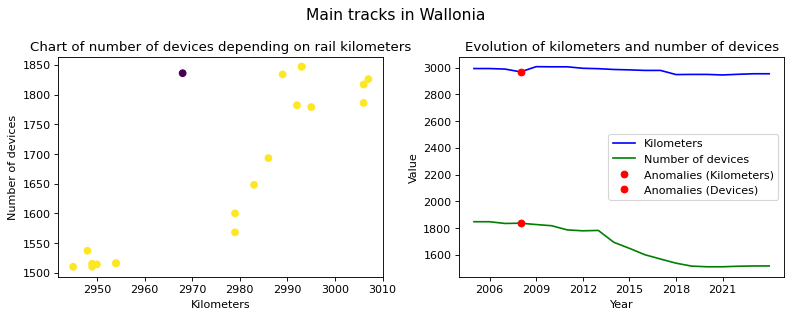

C:\Users\melih\AppData\Local\Temp\ipykernel_18728\594877434.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_row["Year"] = 2005
C:\Users\melih\AppData\Local\Temp\ipykernel_18728\594877434.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_row["Year"] = 2024


Previous Row:
Year                     2011
Region               Wallonia
TrackCat     Secondary tracks
Kilometer                 858
Devices                  2609
Anomaly                     1
Name: 5, dtype: object
Anomaly Detected:
Year                     2012
Region               Wallonia
TrackCat     Secondary tracks
Kilometer                 898
Devices                  2467
Anomaly                    -1
Name: 6, dtype: object
Next Row:
Year                     2013
Region               Wallonia
TrackCat     Secondary tracks
Kilometer                 817
Devices                  1800
Anomaly                     1
Name: 7, dtype: object

--------------------------------------------------



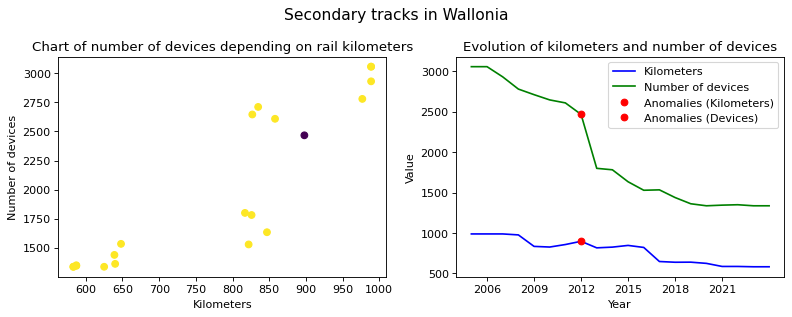

C:\Users\melih\AppData\Local\Temp\ipykernel_18728\594877434.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_row["Year"] = 2005
C:\Users\melih\AppData\Local\Temp\ipykernel_18728\594877434.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_row["Year"] = 2024


Previous Row:
Year                2023
Region          Flanders
TrackCat     Main tracks
Kilometer           3294
Devices             2012
Anomaly                1
Name: 17, dtype: object
Anomaly Detected:
Year                2005
Region          Flanders
TrackCat     Main tracks
Kilometer           2998
Devices             2073
Anomaly               -1
Name: 18, dtype: object

--------------------------------------------------



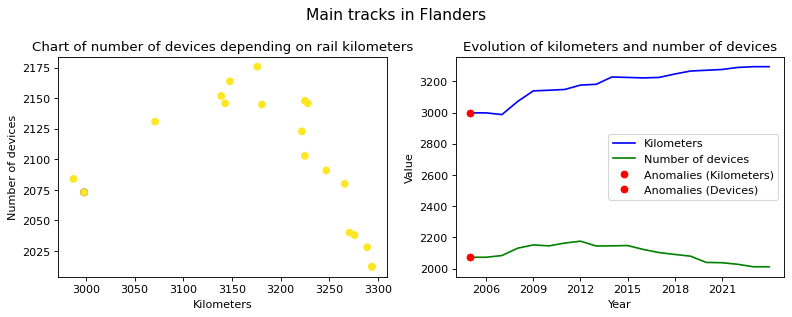

C:\Users\melih\AppData\Local\Temp\ipykernel_18728\594877434.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_row["Year"] = 2005
C:\Users\melih\AppData\Local\Temp\ipykernel_18728\594877434.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_row["Year"] = 2024


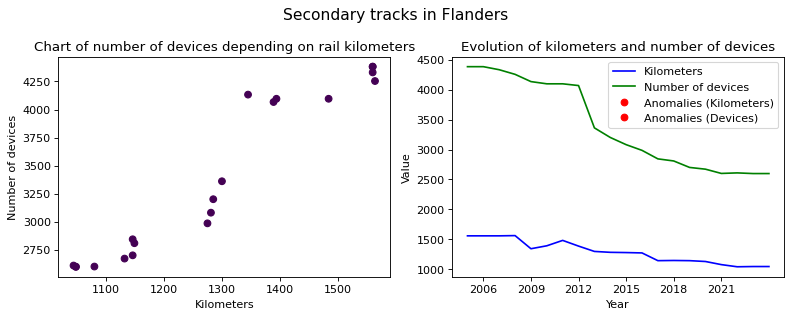

C:\Users\melih\AppData\Local\Temp\ipykernel_18728\594877434.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_row["Year"] = 2005
C:\Users\melih\AppData\Local\Temp\ipykernel_18728\594877434.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_row["Year"] = 2024


Previous Row:
Year                2023
Region          Brussels
TrackCat     Main tracks
Kilometer            317
Devices              473
Anomaly                1
Name: 17, dtype: object
Anomaly Detected:
Year                2005
Region          Brussels
TrackCat     Main tracks
Kilometer            264
Devices              526
Anomaly               -1
Name: 18, dtype: object

--------------------------------------------------



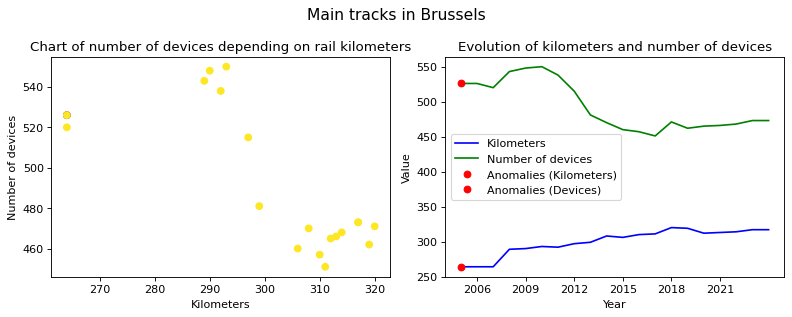

C:\Users\melih\AppData\Local\Temp\ipykernel_18728\594877434.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_row["Year"] = 2005
C:\Users\melih\AppData\Local\Temp\ipykernel_18728\594877434.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_row["Year"] = 2024


Previous Row:
Year                     2007
Region               Brussels
TrackCat     Secondary tracks
Kilometer                 237
Devices                   899
Anomaly                     1
Name: 1, dtype: object
Anomaly Detected:
Year                     2008
Region               Brussels
TrackCat     Secondary tracks
Kilometer                 237
Devices                   870
Anomaly                    -1
Name: 2, dtype: object
Next Row:
Year                     2009
Region               Brussels
TrackCat     Secondary tracks
Kilometer                 216
Devices                   848
Anomaly                     1
Name: 3, dtype: object

--------------------------------------------------



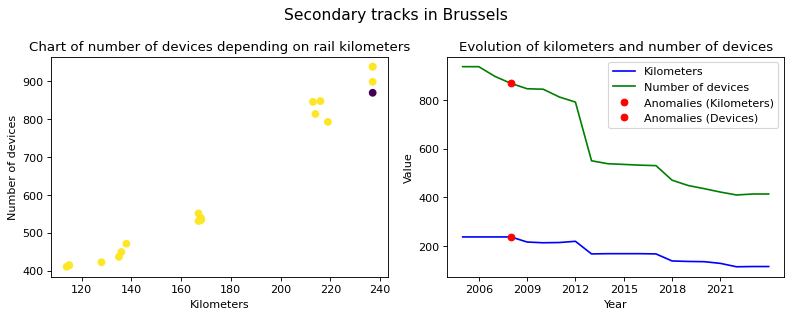

In [171]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

contamination = 0.05

region_id = 2
trackcat_id = 0

for i in range(3):
    for j in range(2):
        region = _dict["Region"][i]
        trackcat = _dict["TrackCat"][j]
        filtered_data = data[data["Region"] == _dict["Region"][i]]
        filtered_data = filtered_data[filtered_data["TrackCat"] == _dict["TrackCat"][j]]

        # Duplicate the first and the last point
        filtered_data = filtered_data.sort_values(by=['Year'],ascending=True)
        first_row = filtered_data.iloc[[0]] 
        last_row = filtered_data.iloc[[-1]]   
        first_row["Year"] = 2005
        last_row["Year"] = 2024
        filtered_data = pd.concat([filtered_data, first_row, last_row], ignore_index=True)

        filtered_data = filtered_data.sort_values(by=['Year'],ascending=True)


        features = filtered_data[["Year", "Kilometer","Devices"]]

        scaler = StandardScaler()
        scaled_features = scaler.fit_transform(features)

        model = IsolationForest(random_state=42, contamination=contamination,n_estimators=10)
        filtered_data['Anomaly'] = model.fit_predict(scaled_features)

        for index, row in filtered_data.iterrows():
            if row['Anomaly']==-1:
                if index > 0:
                    print("Previous Row:")
                    print(filtered_data.iloc[index])
                print("Anomaly Detected:")
                print(row)
                if index < len(filtered_data) - 2:
                    next = filtered_data.iloc[index + 2]
                    print("Next Row:")
                    print(filtered_data.iloc[index + 2])
                print("\n" + "-"*50 + "\n")  

        vue.plot_numericals(region,trackcat,filtered_data,filtered_data['Anomaly'],filtered_data[filtered_data['Anomaly']==-1])


The results indicate that the Isolation Forest identifies cases where the number of devices varies with the number of kilometers abnormally over time.

### Clustering

Another aspect to explore is further division and distinctions within the data. As mentioned earlier, there is potential to make more specific classifications. This section is dedicated to examining those distinctions.

Number of clusters found: 6


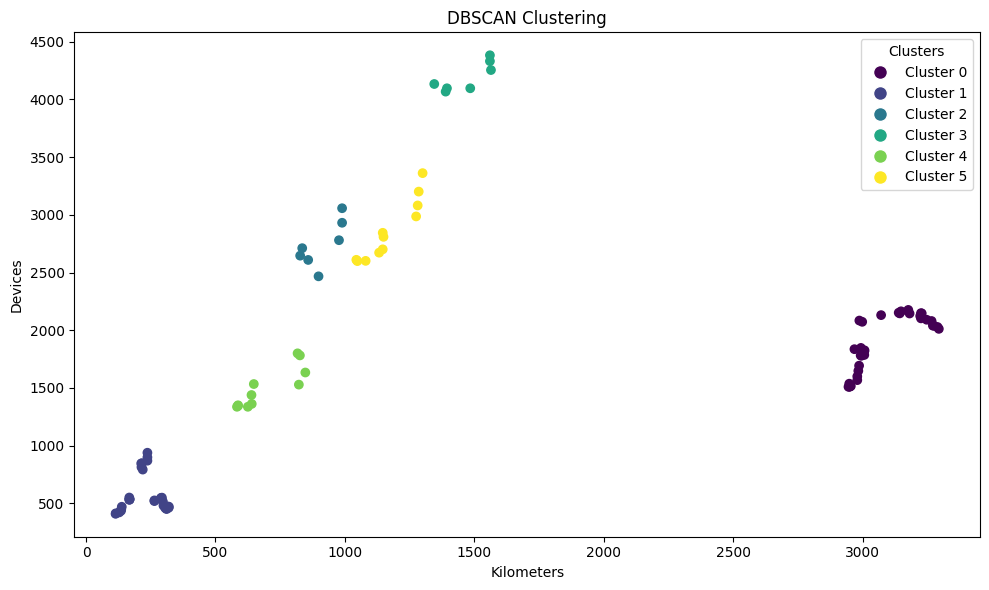

CLUSTER 5 : 
    Year    Region          TrackCat  Kilometer  Devices  Anomaly  Cluster
id                                                                        
20  2013  Flanders  Secondary tracks       1300     3361        1        5
91  2014  Flanders  Secondary tracks       1285     3201        1        5
88  2015  Flanders  Secondary tracks       1281     3081        1        5
14  2016  Flanders  Secondary tracks       1275     2986        1        5
47  2017  Flanders  Secondary tracks       1146     2844        1        5
11  2018  Flanders  Secondary tracks       1149     2809        1        5
9   2019  Flanders  Secondary tracks       1146     2701        1        5
75  2020  Flanders  Secondary tracks       1132     2672        1        5
73  2021  Flanders  Secondary tracks       1080     2601        1        5
2   2022  Flanders  Secondary tracks       1044     2610        1        5
38  2023  Flanders  Secondary tracks       1048     2599        1        5
CLUSTER 2 : 

In [172]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

features = data[['Year', 'Kilometer', 'Devices']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

dbscan = DBSCAN(eps=0.5, min_samples=5) 
data['Cluster'] = dbscan.fit_predict(scaled_features)


num_clusters = len(set(data['Cluster']) - {-1})
print("Number of clusters found:", num_clusters)

plt.figure(figsize=(10, 6))

scatter = plt.scatter(data['Kilometer'], data['Devices'], c=data['Cluster'], cmap='viridis', label='Clusters')

plt.title('DBSCAN Clustering')
plt.xlabel('Kilometers')
plt.ylabel('Devices')

unique_labels = set(data['Cluster'])
handles = []
for label in unique_labels:
    if label != -1:  
        handles.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=10, label=f'Cluster {label}'))

plt.legend(handles=handles, title="Clusters")
plt.tight_layout()
plt.show()

print("CLUSTER 5 : ")
print(data[data["Cluster"]==5])
print("CLUSTER 2 : ")
print(data[data["Cluster"]==2])


After applying the DBSCAN algorithm, I noticed that we can divide the previously defined mixed area into two distinct parts: one for Flanders from 2013 to 2023 and the other for Wallonia from 2006 to 2012. This represents a temporal segmentation where the data is mixed.